In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
%matplotlib inline
from matplotlib import pyplot


In [2]:
df=pd.read_csv("PFconf_200_10_5_0.05_10_5000_5", sep=" ", index_col=False, header=None, names=['obj1','obj2','obj3','obj4','obj5'])

In [4]:
df.corr()

,obj1,obj2,obj3,obj4,obj5
obj1,1.000000,0.129507,-0.985391,0.224621,0.081467
obj2,0.129507,1.000000,-0.133777,0.074803,0.125194
obj3,-0.985391,-0.133777,1.000000,-0.293241,-0.082474
obj4,0.224621,0.074803,-0.293241,1.000000,0.101720
obj5,0.081467,0.125194,-0.082474,0.101720,1.000000


In [5]:
def generateDF(filename, typex, runupdate, problem=None):
    cols = ["MOMBI2", "MOEADD", "NSGA-II", "SPEA2"]
    df = pd.read_csv(filename, sep=";").drop(["Unnamed: 7"], axis=1)
    if problem:
        ndf = df[(df.type ==typex) & (df.runupdate ==runupdate) & (df.problem ==problem)].drop(["type","runupdate","problem"],axis=1)
    else:
        ndf = df[(df.type ==typex) & (df.runupdate ==runupdate)].drop(["type","runupdate","problem"],axis=1)
    ndf.columns= cols
    return ndf

def generateGraph(df, outputfile):
    a4_dims = (11.7, 8.27)
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns_plot=sns.boxplot(ax=ax, data=df)
    plt.tight_layout()
    sns_plot.figure.savefig(outputfile)
    

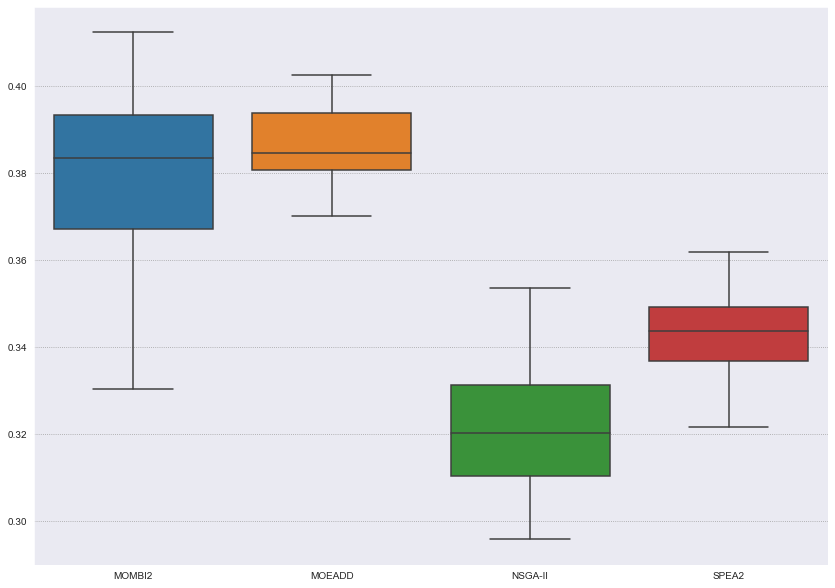

In [10]:
generateGraph(generateDF("nalldata_5obj.csv", 0, 1), "hypervolume5obj.png")

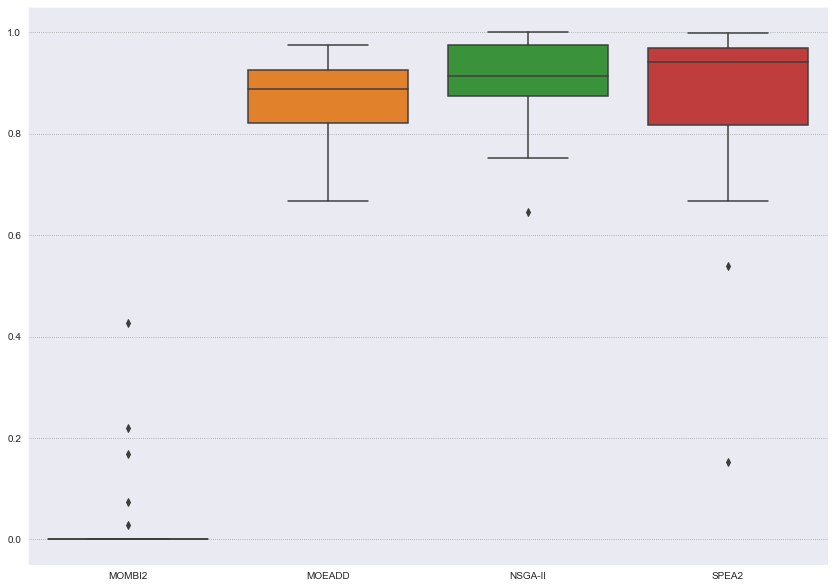

In [11]:
generateGraph(generateDF("nalldata_2obj.csv", 0, 1), "hypervolume2obj.png")

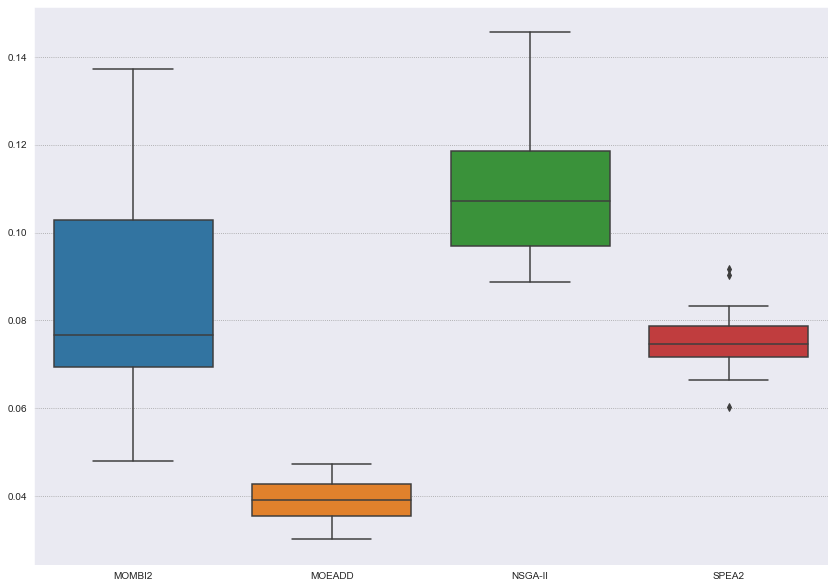

In [12]:
generateGraph(generateDF("nalldata_5obj.csv", 3, 1), "igdp5obj.png")

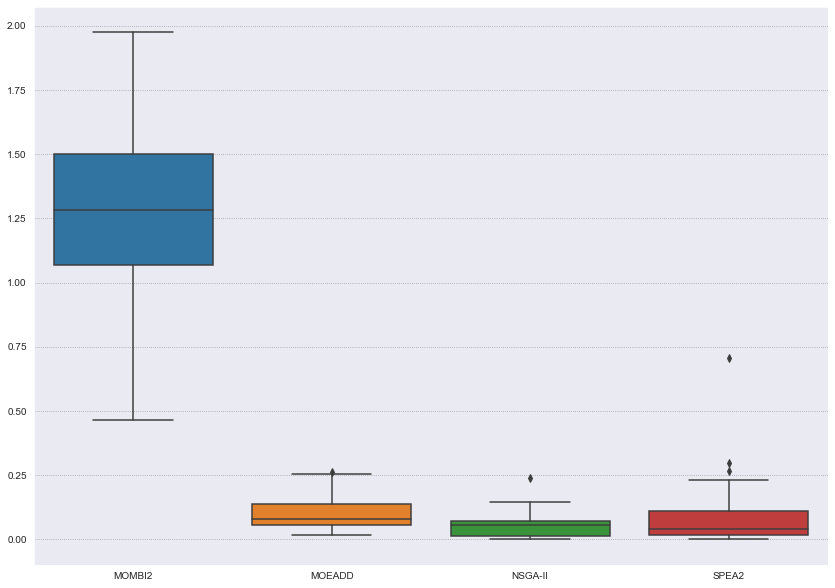

In [58]:
generateGraph(generateDF("nalldata_2obj.csv", 3, 1), "igdp2obj.png")

In [65]:
cols = ["Metric","MOMBI2", "MOEADD", "NSGA-II", "SPEA2"]
df=pd.read_csv("nalldata_2obj.csv", sep=";").drop(["Unnamed: 7","runupdate", "problem"], axis=1)
df.columns=cols
df.Metric=df.Metric.apply(lambda x: "Hypervolume"if x==0 else "IGD+")
print(df.groupby("Metric").agg(["mean","std", "max"]).to_latex())
print(df.groupby("Metric").agg(["mean","std", "max"]).T.to_latex())
print(df.groupby("Metric").agg(["mean"]).T)

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{3}{l}{MOMBI2} & \multicolumn{3}{l}{MOEADD} & \multicolumn{3}{l}{NSGA-II} & \multicolumn{3}{l}{SPEA2} \\
{} &      mean &       std &       max &      mean &       std &       max &      mean &       std &       max &      mean &       std &       max \\
Metric      &           &           &           &           &           &           &           &           &           &           &           &           \\
\midrule
Hypervolume &  0.030525 &  0.090247 &  0.425940 &  0.859607 &  0.090352 &  0.974304 &  0.904303 &  0.084679 &  0.999828 &  0.862924 &  0.180627 &  0.999379 \\
IGD+        &  1.242683 &  0.354033 &  1.973713 &  0.103377 &  0.068957 &  0.263218 &  0.056089 &  0.053044 &  0.239230 &  0.096932 &  0.143008 &  0.704847 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
      & Metric &  Hypervolume &      IGD+ \\
\midrule
MOMBI2 & mean &     0.030525 &  1.242683 \\
      & std &     0.090247 &  0.354033 \\
    

In [66]:
df=pd.read_csv("nalldata_5obj.csv", sep=";").drop(["Unnamed: 7","runupdate", "problem"], axis=1)
df.columns=cols
df.Metric=df.Metric.apply(lambda x: "Hypervolume"if x==0 else "IGD+")
print(df.groupby("Metric").agg(["mean","std", "max"]).to_latex())
print(df.groupby("Metric").agg(["mean","std", "max"]).T.to_latex())
print(df.groupby("Metric").agg(["mean"]).T)

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{3}{l}{MOMBI2} & \multicolumn{3}{l}{MOEADD} & \multicolumn{3}{l}{NSGA-II} & \multicolumn{3}{l}{SPEA2} \\
{} &      mean &       std &       max &      mean &       std &       max &      mean &       std &       max &      mean &       std &       max \\
Metric      &           &           &           &           &           &           &           &           &           &           &           &           \\
\midrule
Hypervolume &  0.378164 &  0.022794 &  0.412411 &  0.386071 &  0.009275 &  0.402583 &  0.321709 &  0.014935 &  0.353739 &  0.343156 &  0.009625 &  0.361828 \\
IGD+        &  0.086026 &  0.026758 &  0.137319 &  0.039012 &  0.004931 &  0.047243 &  0.109361 &  0.014614 &  0.145614 &  0.075612 &  0.006417 &  0.091765 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
      & Metric &  Hypervolume &      IGD+ \\
\midrule
MOMBI2 & mean &     0.378164 &  0.086026 \\
      & std &     0.022794 &  0.026758 \\
    

In [56]:
df=pd.read_csv("nalldata_2obj.csv", sep=";").drop(["Unnamed: 7","runupdate", "problem"], axis=1)
df=df[df.type==0]
df.to_csv("hyp_nalldata_2obj.csv")

In [57]:
df=pd.read_csv("nalldata_5obj.csv", sep=";").drop(["Unnamed: 7","runupdate", "problem"], axis=1)
df=df[df.type==3]
df.to_csv("igd_nalldata_5obj.csv")

In [2]:
df=pd.read_csv("nalldata_2obj.csv", sep=";").drop(["Unnamed: 7","runupdate", "problem"], axis=1)
df=df[df.type==3]
df.to_csv("igd_nalldata_2obj.csv")

In [3]:
df=pd.read_csv("nalldata_5obj.csv", sep=";").drop(["Unnamed: 7","runupdate", "problem"], axis=1)
df=df[df.type==0]
df.to_csv("hyp_nalldata_5obj.csv")

In [73]:
def gen3dplotthree(x,y,z):
    algs=["MoeaDD", "Mombi2", "Nsgaii", "Spea2"]
    a4_dims = (11.7, 8.27)
    basePath="/Users/viniciusdecarvalho/PJT/NormSystemOptimization/result/"
    m=5
    df=pd.DataFrame(columns=['obj1','obj2','obj3','obj4','obj5','alg'])
    for alg in algs:
        path=basePath+alg+"/NormSystem_obj_"+str(m)+"/conf_200_10_5_0.05_10_5000/500/FUN_ALLMIN0"
        #print(path)
        partial=pd.read_csv(path, sep=" ", index_col=False, header=None, names=['obj1','obj2','obj3','obj4','obj5'])
        partial['alg']=alg
        df=df.append(partial)
    fig = px.scatter_3d(df, x=x, y=y, z=z,
                  color='alg', width=800, height=800)
    fig.update_layout(
        margin=dict(l=50, r=50, t=50, b=50)
    )
    fig.write_html("graphs/"+x+"_"+y+"_"+z+".html")
    fig.write_image("graphs_images/"+x+"_"+y+"_"+z+".png")
    return fig

def gen3dplot(z):
    return gen3dplotthree('obj1','obj2', z)

In [74]:
gen3dplot('obj3').show()

In [75]:
gen3dplot('obj4').show()
    

In [76]:
gen3dplot('obj5').show()

In [77]:
gen3dplotthree('obj3','obj4', 'obj5').show()

In [78]:
gen3dplotthree('obj1','obj4', 'obj5').show()

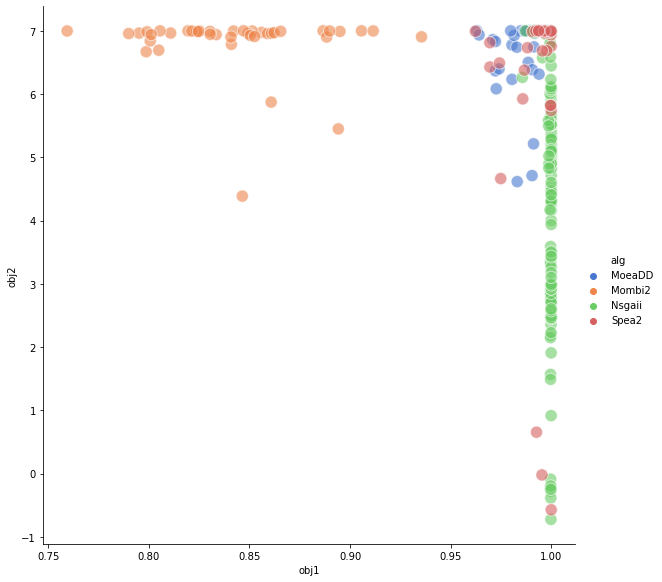

In [103]:
algs=["MoeaDD", "Mombi2", "Nsgaii", "Spea2"]
a4_dims = (11.7, 8.27)
basePath="/Users/viniciusdecarvalho/PJT/NormSystemOptimization/result/"
m=2
df=pd.DataFrame(columns=['obj1','obj2','alg'])
for alg in algs:
    path=basePath+alg+"/NormSystem_obj_"+str(m)+"/conf_200_10_5_0.05_10_5000/500/FUN_ALLMIN_ALL"
    #print(path)
    partial=pd.read_csv(path, sep=" ", index_col=False, header=None, names=['obj1','obj2'])
    partial['alg']=alg
    df=df.append(partial)


sns_plot = sns.relplot(x="obj1", y="obj2", hue="alg",
            sizes=(40, 400), alpha=.6, palette="muted",
            height=8, data=df, s=150)
sns_plot.savefig("graphs_images/2obj.png")